#Análise exploratória de duas bases de dados


In [ ]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

##Space Missions

Para a base Space_Corrected.csv, responder as questões:
* Qual é o total de missões registradas?
* Quantas foram bem sucedidas?
* Custo das missões por ano?
* Que dado interessante você poderia acrescentar ao estudo?

###Análie se tratamento dos dados

In [ ]:
# Leitura do dataset
df_rocket_staging = pd.read_csv("https://raw.githubusercontent.com/vitorfguerra/leega-academy/main/Space_Corrected.csv")

In [ ]:
df_rocket_staging

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_rocket_staging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df_rocket_staging[df_rocket_staging['Company Name'] == 'SpaceX']

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
17,17,17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Tue Jun 30, 2020 20:10 UTC",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.0,Success
20,20,20,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Jun 13, 2020 09:21 UTC",Falcon 9 Block 5 | Starlink V1 L8 & SkySat 16 ...,StatusActive,50.0,Success
...,...,...,...,...,...,...,...,...,...
763,763,763,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Tue Jul 14, 2009 03:35 UTC",Falcon 1 | RazakSat,StatusRetired,7.0,Success
800,800,800,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Sep 28, 2008 23:15 UTC",Falcon 1 | RatSat,StatusRetired,7.0,Success
808,808,808,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Aug 03, 2008 03:34 UTC",Falcon 1 | Flight 3,StatusRetired,7.0,Failure
879,879,879,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Wed Mar 21, 2007 01:10 UTC",Falcon 1 | DemoSat,StatusRetired,7.0,Failure


In [ ]:
#Exibindo a quantidade de dados nulos por coluna
display(df_rocket_staging.isnull().sum())

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [ ]:
#Exibindo a porcentagem de dados nulos por coluna
display(round((df_rocket_staging.isnull().sum()/(len(df_rocket_staging))*100),2))

Unnamed: 0.1       0.00
Unnamed: 0         0.00
Company Name       0.00
Location           0.00
Datum              0.00
Detail             0.00
Status Rocket      0.00
 Rocket           77.71
Status Mission     0.00
dtype: float64

In [ ]:
df_rocket_staging.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,4324.0,NaN,NaN,NaN,2161.5,1248.375611,0.0,1080.75,2161.5,3242.25,4323.0
Unnamed: 0,4324.0,NaN,NaN,NaN,2161.5,1248.375611,0.0,1080.75,2161.5,3242.25,4323.0
Company Name,4324,56,RVSN USSR,1777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,4324,137,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Datum,4324,4319,"Wed Nov 05, 2008 00:15 UTC",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detail,4324,4278,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status Rocket,4324,2,StatusRetired,3534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rocket,964,56,450.0,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status Mission,4324,4,Success,3879,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
igual = df_rocket_staging['Unnamed: 0'] == df_rocket_staging['Unnamed: 0.1']
igual.value_counts()

True    4324
dtype: int64

In [ ]:
df_rocket = df_rocket_staging

In [ ]:
df_rocket.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace = True)
df_rocket.columns = df_rocket.columns.str.strip()

In [ ]:
df_rocket['Rocket'] = df_rocket['Rocket'].str.replace(',','')
df_rocket['Rocket'] = pd.to_numeric(df_rocket['Rocket'])

In [ ]:
df_rocket["country"] = df_rocket["Location"].str.split(", ").str[-1]

In [ ]:
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

df_rocket['country']=df_rocket['country'].replace(countries_dict) 

In [ ]:
df_rocket['year'] = pd.to_datetime(df_rocket['Datum']).apply(lambda datetime:datetime.year)

In [ ]:
df_rocket['day'] = pd.to_datetime(df_rocket['Datum']).apply(lambda datetime:datetime.day)
df_rocket['month'] = pd.to_datetime(df_rocket['Datum']).apply(lambda datetime:datetime.month)
df_rocket['year'] = pd.to_datetime(df_rocket['Datum']).apply(lambda datetime:datetime.year)

In [ ]:
fig=px.box(df_rocket, y='Rocket', width=600, height=1000)

fig.show()

In [ ]:
df_drop = df_rocket.loc[(df_rocket['Rocket']>3000)]
df_rocket = df_rocket.drop(df_drop.index)


In [ ]:
df_rocket['Company Name'].value_counts().reset_index()[:10]

,index,Company Name
0,RVSN USSR,1775
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [ ]:
df_money = df_rocket.groupby(['Company Name'])['Rocket'].sum().reset_index().sort_values(by = ['Rocket'], ascending = False)[:15]
df_money = df_money[df_money['Rocket']>0]

df_money.reset_index(drop=True)

,Company Name,Rocket
0,NASA,76280.00
1,Arianespace,16345.00
2,ULA,14798.00
3,CASC,6340.26
4,SpaceX,5444.00
5,Northrop,3930.00
6,MHI,3532.50
7,ISRO,2177.00
8,US Air Force,1550.92
9,VKS RF,1548.90


###Sucesso das missões

In [ ]:
df_rocket['Status Mission'].count()

4322

In [ ]:
df_status = df_rocket['Status Mission'].value_counts().reset_index()
df_status.columns = ['Status', 'Contagem']
df_status

,Status,Contagem
0,Success,3877
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [ ]:
fig = px.bar(df_status, 
             x='Status', 
             y='Contagem', 
             title='Status da Missão',
             color='Status',
             color_discrete_sequence=['green', 'red', 'orange', 'yellow'],
             text='Contagem'
             )
fig.update_traces(textposition='auto')
fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
df_status_year = df_rocket.groupby(['year', 'Status Mission'])['Company Name'].count().reset_index()
df_status_year.columns = ['year', 'Status Mission', 'Missões']
df_status_year 

,year,Status Mission,Missões
0,1957,Failure,1
1,1957,Success,2
2,1958,Failure,20
3,1958,Partial Failure,2
4,1958,Success,6
...,...,...,...
173,2019,Partial Failure,2
174,2019,Prelaunch Failure,1
175,2019,Success,100
176,2020,Failure,6


In [ ]:
df_company_launchs = df_rocket['Company Name'].value_counts().reset_index().sort_values(by ='Company Name', ascending= False)
df_company_launchs.columns = ['Company Name', 'Contagem']

df_company_launchs=df_company_launchs[:15]
df_company_launchs

,Company Name,Contagem
0,RVSN USSR,1775
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [ ]:
fig = px.bar(df_company_launchs, 
             x='Company Name', 
             y='Contagem', 
             title='Lançamento por Companhia (TOP 15)',
             width=1200,
             labels={
             'Company Name': 'Companhia',
             'Contagem': 'Qnt de Lançamentos'
             },
             text='Contagem'
             )
fig.update_traces(textposition='auto', texttemplate='%{text:.3s}')
fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
df_country_launchs = df_rocket['country'].value_counts().reset_index().sort_values(by ='country', ascending= False)
df_country_launchs.columns = ['country', 'Contagem']

df_country_launchs=df_country_launchs[:15]
df_country_launchs

,country,Contagem
0,Russian Federation,1398
1,USA,1351
2,Kazakhstan,699
3,France,303
4,China,269
5,Japan,126
6,India,76
7,Pacific Ocean,36
8,Iran,14
9,New Zealand,13


In [ ]:
fig = px.bar(df_country_launchs, 
             x='country', 
             y='Contagem', 
             title='Lançamento por País',
             width=1200,
             labels={
             'country': 'País',
             'Contagem': 'Qnt de Lançamentos'
             },
             text='Contagem'
             )
fig.update_traces(textposition='auto', texttemplate='%{text:.3s}')
fig.update_yaxes(showticklabels=False)
fig.show()

In [ ]:
df_year_launchs = df_rocket['year'].value_counts().reset_index()
df_year_launchs.columns = ['year', 'Contagem']

df_year_launchs=df_year_launchs.sort_values(by ='year')
df_year_launchs

,year,Contagem
63,1957,3
61,1958,28
62,1959,20
57,1960,39
42,1961,52
...,...,...
16,2016,90
15,2017,92
1,2018,117
5,2019,109


In [ ]:
fig = px.line(df_year_launchs, 
             x='year', 
             y='Contagem', 
             title='Lançamentos por ano',
             width=1200,
             labels={
             'year': 'Ano',
             'Contagem': 'Qnt de Lançamentos'
             }
             )

fig.show()

In [ ]:
df_year_launchs2 = df_rocket.groupby(['Status Mission', 'year'])['Status Rocket'].count().reset_index()
df_year_launchs2.columns = ['Status', 'year', 'contagem']

df_year_launchs2

,Status,year,contagem
0,Failure,1957,1
1,Failure,1958,20
2,Failure,1959,9
3,Failure,1960,20
4,Failure,1961,17
...,...,...,...
173,Success,2016,86
174,Success,2017,84
175,Success,2018,113
176,Success,2019,100


In [ ]:
fig = px.line(df_year_launchs2, 
             x='year', 
             y='contagem', 
             title='Lançamentos por ano por status',
             color='Status',
             color_discrete_sequence=['red', 'orange', 'yellow', 'green'],
             width=1200,
             labels={
             'year': 'Ano',
             'Contagem': 'Qnt de Lançamentos'
             }
             )

fig.show()

###Custo das missões

In [ ]:
df_money = df_rocket.groupby(['year', 'country'])['Rocket'].sum().reset_index().sort_values(by = ['Rocket'], ascending = False)
df_money = df_money[df_money['Rocket']>0]

df_money = df_money.reset_index(drop=True).sort_values('year')
df_money

,year,country,Rocket
107,1964,USA,126.46
108,1965,USA,126.46
98,1966,USA,177.00
34,1967,USA,1573.00
11,1968,USA,2792.00
...,...,...,...
70,2020,France,400.00
76,2020,Kazakhstan,307.50
37,2020,USA,1326.00
79,2020,Japan,292.50


In [ ]:
fig = px.area(df_money, 
             x='year', 
             y='Rocket', 
             title='Custo por ano em milhões de dólares',
             color='country',             
             labels={
             'year': 'Ano',
             'Rocket': 'Milhões de Dólares'
             },
              width=1200
             )

fig.show()

In [ ]:
df_status2 = df_rocket.groupby(['Status Rocket', 'year'])['Status Mission'].count().reset_index()
df_status2.columns = ['Status', 'year', 'contagem']

df_status2

,Status,year,contagem
0,StatusActive,1982,1
1,StatusActive,1983,1
2,StatusActive,1984,1
3,StatusActive,1985,1
4,StatusActive,1986,1
...,...,...,...
96,StatusRetired,2016,24
97,StatusRetired,2017,28
98,StatusRetired,2018,24
99,StatusRetired,2019,9


In [ ]:
fig = px.bar(df_status2, 
             x='year', 
             y='contagem', 
             title='Status (ativo ou não) por ano de lançamento',
             color='Status',
             color_discrete_sequence=['green', 'orange'],
             width=1200,
             labels={
             'year': 'Ano',
             'Contagem': 'Qnt de Lançamentos'
             }
             )

fig.show()

In [ ]:
#Criar a coluno Rocket name a partir do Detail
df_rocket["Rocket name"] = df_rocket['Detail'].str.split("|").str[0]

In [ ]:
df_active_rocket = df_rocket.groupby(['country','Company Name', 'Rocket name'])['Status Rocket'].value_counts()
df_active_rocket = df_active_rocket.to_frame()
df_active_rocket

Status Rocket
country   Company Name Rocket name         Status Rocket               
Australia AMBA         Redstone Sparta     StatusRetired              1
          CECLES       Europa 1            StatusRetired              3
          RAE          Black Arrow         StatusRetired              2
Brazil    AEB          VLS-1               StatusActive               3
China     CASC         Feng Bao 1          StatusRetired             11
...                                                                 ...
USA       US Air Force Titan IIIA          StatusRetired              4
                       Titan IIIB          StatusRetired             22
          US Navy      NOTS-EV-1 Pilot II  StatusRetired              6
                       Vanguard            StatusRetired             11
          Virgin Orbit LauncherOne         StatusActive               1

[417 rows x 1 columns]

###Outros

In [ ]:
cross_tab_prop = pd.crosstab(index=df_rocket['country'],
                             columns=df_rocket['Status Mission'],
                             normalize="index")
cross_tab_prop = cross_tab_prop.reset_index()
cross_tab_prop[['Failure','Partial Failure', 'Prelaunch Failure','Success']] = cross_tab_prop[['Failure','Partial Failure', 'Prelaunch Failure','Success']]*100
cross_tab_prop

Status Mission,country,Failure,Partial Failure,Prelaunch Failure,Success
0,Australia,50.000000,0.000000,0.000000,50.000000
1,Brazil,66.666667,0.000000,33.333333,0.000000
2,China,7.063197,2.230483,0.000000,90.706320
3,France,4.290429,1.650165,0.000000,94.059406
4,India,10.526316,6.578947,0.000000,82.894737
5,Iran,57.142857,0.000000,7.142857,35.714286
6,Israel,18.181818,0.000000,0.000000,81.818182
7,Japan,7.936508,2.380952,0.000000,89.682540
8,Kazakhstan,10.300429,2.861230,0.143062,86.695279
9,Kenya,0.000000,0.000000,0.000000,100.000000


In [ ]:
status = ['Failure','Partial Failure', 'Prelaunch Failure','Success']
fig = px.bar(cross_tab_prop,
             x='country',
             y= status,
             color_discrete_sequence=['red', 'orange', 'yellow', 'green'],
             width=1200
             )
fig.show()

In [ ]:
df_company_launchs = df_rocket[['Company Name', 'country']].value_counts().reset_index()
df_company_launchs.columns = ['Company Name', 'country', 'lancamentos']
df_company_launchs

,Company Name,country,lancamentos
0,RVSN USSR,Russian Federation,1198
1,RVSN USSR,Kazakhstan,577
2,Arianespace,France,277
3,CASC,China,251
4,General Dynamics,USA,251
...,...,...,...
60,Khrunichev,Russian Federation,1
61,Sandia,USA,1
62,AMBA,Australia,1
63,Landspace,China,1


In [ ]:
pip install country_converter --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
df_launchs_by_year = df_rocket.groupby(['year', 'country'])['Status Mission'].count().reset_index().sort_values(by = ['year'])
df_launchs_by_year["ISO Country"] = cc.pandas_convert(series=df_launchs_by_year['country'], to='ISO3') 

In [ ]:
fig = px.scatter_geo(df_launchs_by_year,
                     locations='ISO Country',
                     color='country',
                     hover_name='country',
                     size='Status Mission',
                     projection='natural earth')
fig.show()

In [ ]:
df_rocket_map = df_rocket.dropna()
df_rocket_map["ISO Country"] = cc.pandas_convert(series=df_launchs_by_year['country'], to='ISO3') 

<ipython-input-107-c57b5c6dac71>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter_geo(df_rocket_map,
                     locationmode='ISO-3', 
                     locations='ISO Country', 
                     color='country', 
                     size='Rocket', 
                     projection='natural earth',
                     animation_frame='year'
                     )
fig.show()

In [ ]:
df_money_x_year = data.groupby(['year'])['Rocket'].sum().reset_index().sort_values(by = ['year'], ascending = False)
df_money_x_year = df_money_x_year[df_money_x_year['Rocket']>0]

df_money_x_year.reset_index(drop=True)

In [ ]:
df_success = data.groupby(['year','Status Mission','country']).agg(contagem=('Status Mission','count')).sort_values(by=['year', 'Status Mission', 'contagem'], ascending=False)
df_success

##World Happiness

Para a base world-happiness-report.csv, responder as questões:
* Qual foi o pais com menor indice "Life Ladder"? 
* Qual é a média de "Generosity" dos TOP 10 países, por ano? 
* Qual foi o pais que teve queda de "Genorosity" ao longo dos anos ? Classificar o TOP 5
* Que dado interessante você poderia acrescentar ao estudo?

###Tratamento e análise dos dados

In [ ]:
df_wh_staging = pd.read_csv("https://raw.githubusercontent.com/vitorfguerra/leega-academy/main/world-happiness-report.csv")

In [ ]:
df_wh_staging

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [ ]:
df_wh_staging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [ ]:
df_wh_staging.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country name,1949,166,Zimbabwe,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1949.0,NaN,NaN,NaN,2013.216008,4.166828,2005.0,2010.0,2013.0,2017.0,2020.0
Life Ladder,1949.0,NaN,NaN,NaN,5.466705,1.115711,2.375,4.64,5.386,6.283,8.019
Log GDP per capita,1913.0,NaN,NaN,NaN,9.368453,1.154084,6.635,8.464,9.46,10.353,11.648
Social support,1936.0,NaN,NaN,NaN,0.812552,0.118482,0.29,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,NaN,NaN,NaN,63.359374,7.510245,32.3,58.685,65.2,68.59,77.1
Freedom to make life choices,1917.0,NaN,NaN,NaN,0.742558,0.142093,0.258,0.647,0.763,0.856,0.985
Generosity,1860.0,NaN,NaN,NaN,0.000103,0.162215,-0.335,-0.113,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,NaN,NaN,NaN,0.747125,0.186789,0.035,0.69,0.802,0.872,0.983
Positive affect,1927.0,NaN,NaN,NaN,0.710003,0.1071,0.322,0.6255,0.722,0.799,0.944


In [ ]:
#Exibindo a quantidade de dados nulos por coluna
display(df_wh_staging.isnull().sum())

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [ ]:
#Exibindo a porcentagem de dados nulos por coluna
display(round((df_wh_staging.isnull().sum()/(len(df_wh_staging))*100),2))

Country name                        0.00
year                                0.00
Life Ladder                         0.00
Log GDP per capita                  1.85
Social support                      0.67
Healthy life expectancy at birth    2.82
Freedom to make life choices        1.64
Generosity                          4.57
Perceptions of corruption           5.64
Positive affect                     1.13
Negative affect                     0.82
dtype: float64

In [ ]:
# Copiando os dados brutos para um novo data frame para aplicar os tratamentos
df_wh = df_wh_staging

In [ ]:
#removendo espaços nos títulosd as colunas
df_wh.columns = df_wh.columns.str.strip()

#removendo valores nulos
df_wh = df_wh.dropna()

In [ ]:
#Percetagem de linhas com valores nulos removidos
perc_na = ((len(df_wh_staging) - len(df_wh))/len(df_wh_staging))*100
perc_na = round(perc_na, 2)
print('{}% das linhas continham valores nulos e foram removidas'.format(perc_na))

12.37% das linhas continham valores nulos e foram removidas


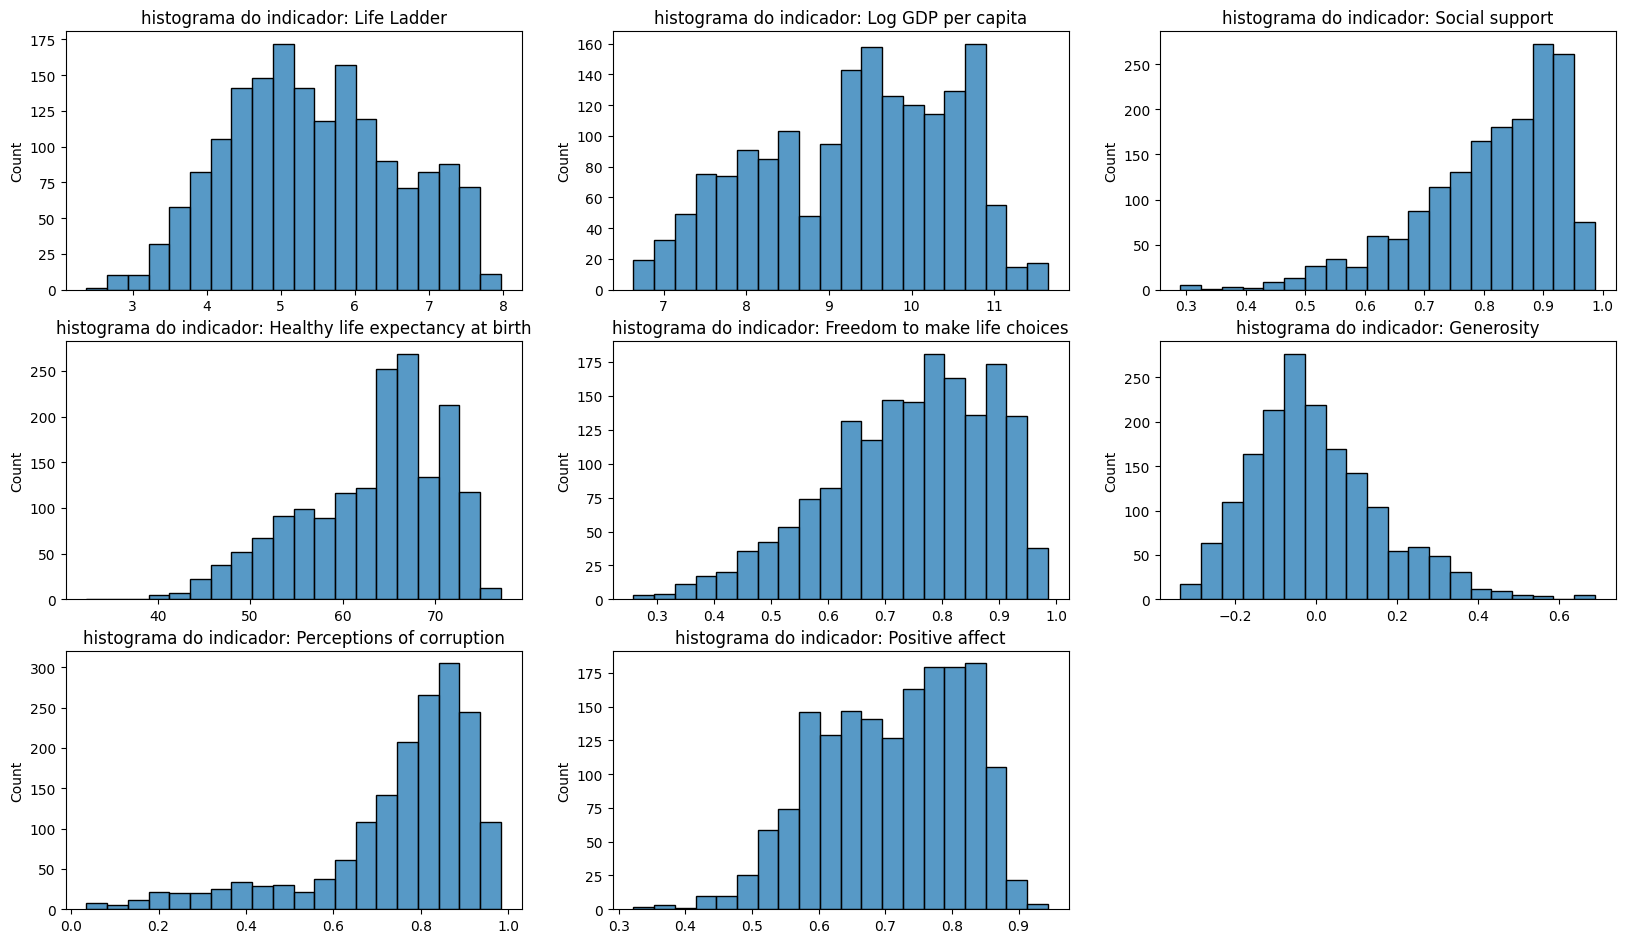

In [ ]:
# Distribuição dos indicadores
indicadores = df_wh.iloc[:,2:10].columns
plt.figure(figsize=(20,28*4))
gs = gridspec.GridSpec(28, 3)
for i, indicador in enumerate(df_wh[indicadores]):
    ax = plt.subplot(gs[i])
    sns.histplot(df_wh[indicador], bins=20)
    ax.set_xlabel('')
    ax.set_title('histograma do indicador: ' + str(indicador))
plt.show()

<ipython-input-59-9c44091b04ca>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



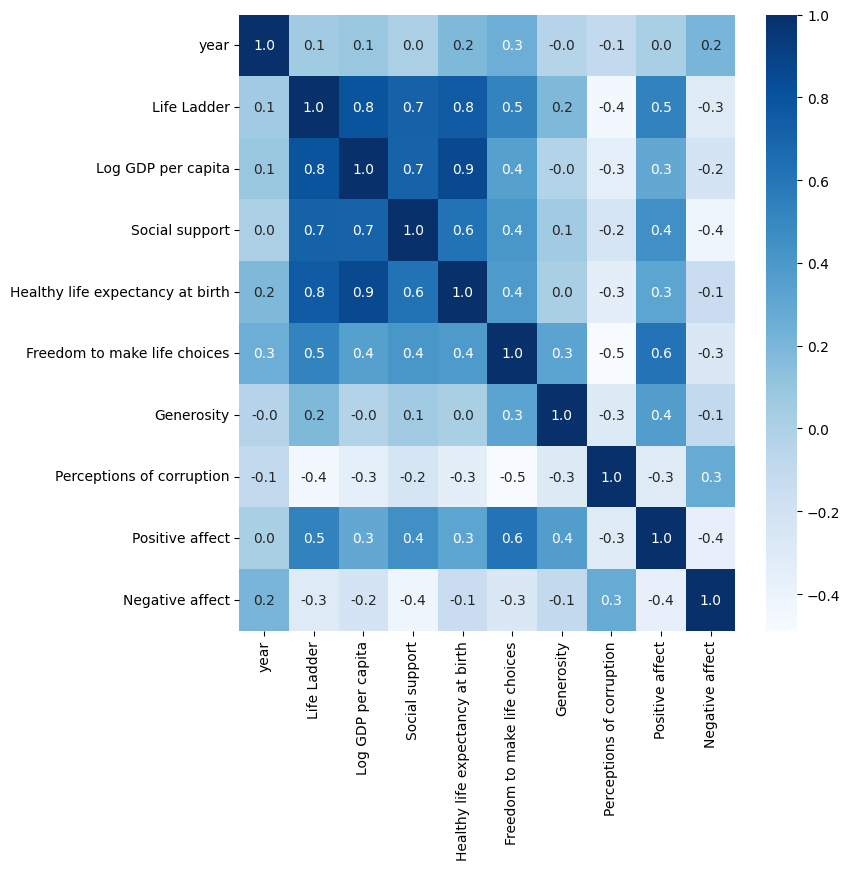

In [ ]:
#Mapa de correlação dos indicadores
correlation_matrix = df_wh.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

###Análise dos países com menor indice de Life Ladder

In [ ]:
#Menor Life Ladder

df_menor_ll = df_wh[['Country name', 'year', 'Life Ladder']].sort_values(by='Life Ladder')[:15].reset_index(drop=True)
df_menor_ll

,Country name,year,Life Ladder
0,Afghanistan,2019,2.375
1,Afghanistan,2017,2.662
2,Syria,2013,2.688
3,Central African Republic,2016,2.693
4,Zimbabwe,2019,2.694
5,Afghanistan,2018,2.694
6,Liberia,2015,2.702
7,Togo,2008,2.808
8,Togo,2014,2.839
9,Tanzania,2016,2.903


In [ ]:
#Menor Life Ladder médio

df_ll_medio = df_wh[['Country name','Life Ladder']].groupby('Country name')['Life Ladder'].mean().reset_index()
df_ll_medio = df_ll_medio.sort_values('Life Ladder').reset_index(drop=True)[:15]
df_ll_medio

,Country name,Life Ladder
0,Central African Republic,3.515000
1,Burundi,3.548200
2,Togo,3.555000
3,Afghanistan,3.594667
4,Rwanda,3.603455
5,Tanzania,3.697333
6,Zimbabwe,3.882600
7,Comoros,3.944000
8,Haiti,3.954182
9,Madagascar,3.980900


In [ ]:
#Maior Life Ladder médio

df_ll_medio_maior = df_wh[['Country name','Life Ladder']].groupby('Country name')['Life Ladder'].mean().reset_index()
df_ll_medio_maior = df_ll_medio_maior.sort_values('Life Ladder').reset_index(drop=True)
df_ll_medio_maior

,Country name,Life Ladder
0,Central African Republic,3.515000
1,Burundi,3.548200
2,Togo,3.555000
3,Afghanistan,3.594667
4,Rwanda,3.603455
...,...,...
150,Netherlands,7.466462
151,Norway,7.512400
152,Switzerland,7.548300
153,Finland,7.597154


In [ ]:
df = df_wh[df_wh['Country name'].isin( df_ll_medio['Country name'])]


fig = px.bar(df_ll_medio,
             x='Country name',
             y='Life Ladder',
             color_discrete_sequence=['indianred'],
             title='Países com a menor média de Life Ladder',
             width=1200           
             )
fig.show()

In [ ]:
df = df_wh[df_wh['Country name'].isin( df_ll_medio['Country name'])]

fig = px.line(df,
             x='year',
             y='Life Ladder',
             color='Country name',
             line_shape='spline',
             width=1200
             )
fig.show()

In [ ]:
#Gráficos dos 15 países com menor Life Ladder médio
df = df_wh[df_wh['Country name'].isin( df_ll_medio['Country name'])]

fig = px.line(df,
             x='year',
             y='Life Ladder',
             facet_col='Country name',
             facet_col_wrap= 3,
             height=800,
             width=1200   
             )
fig.show()

###Análise dos países com maior média de Generosity

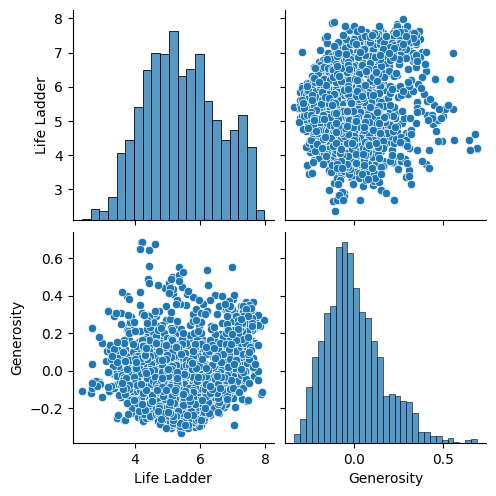

In [ ]:
#Análise dos indicadores
sns.pairplot(data=df_wh, vars=['Life Ladder','Generosity'])
plt.show()

In [ ]:
#agrupando por ano e pegando os 10 maiores valores de generosity por ano
df_media_generosity = df_wh.groupby(['year'])['Generosity'].nlargest(10).reset_index()
df_media_generosity = df_media_generosity[['year', 'Generosity']]

#Média dos 10 maiores valores para cada ano
df_media_generosity = df_media_generosity.groupby(['year']).mean().reset_index()
df_media_generosity

,year,Generosity
0,2005,0.2560
1,2006,0.3078
2,2007,0.3344
3,2008,0.3316
4,2009,0.3001
5,2010,0.3564
6,2011,0.3721
7,2012,0.3522
8,2013,0.3767
9,2014,0.3657


In [ ]:
fig = px.line(df_media_generosity,
             x='year',
             y='Generosity',
             title='Média de Generosity dos Top 10 por ano'
             )
fig.show()

In [ ]:
df_wh.sort_values(by=['year', 'Life Ladder'], ascending=False)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
563,Finland,2020,7.889,10.750,0.962,72.10,0.962,-0.116,0.164,0.744,0.193
731,Iceland,2020,7.575,10.824,0.983,73.00,0.949,0.160,0.644,0.863,0.172
463,Denmark,2020,7.515,10.910,0.947,73.00,0.938,0.052,0.214,0.818,0.227
1661,Switzerland,2020,7.508,11.081,0.946,74.70,0.917,-0.064,0.280,0.769,0.193
1224,Netherlands,2020,7.504,10.901,0.944,72.50,0.935,0.151,0.281,0.784,0.247
...,...,...,...,...,...,...,...,...,...,...,...
1509,Sierra Leone,2006,3.628,7.136,0.561,40.30,0.679,0.101,0.836,0.505,0.381
313,Chad,2006,3.435,7.360,0.724,43.18,0.306,0.028,0.961,0.580,0.263
163,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,0.587,0.309
1727,Togo,2006,3.202,7.078,0.435,49.26,0.628,-0.007,0.850,0.615,0.348


In [ ]:
df_top10 = pd.DataFrame(columns=df_wh.columns)

unique_year = df_wh['year'].unique()

for year in unique_year:

  df_temp = df_wh[df_wh['year'] == year].sort_values(by=['Generosity'], ascending=False).head(10)

  df_top10 = pd.concat([df_top10, df_temp])

df_top10 = df_top10.sort_values(by=['year'], ascending=False).reset_index(drop=True)
df_top10

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Netherlands,2020,7.504,10.901,0.944,72.50,0.935,0.151,0.281,0.784,0.247
1,Iceland,2020,7.575,10.824,0.983,73.00,0.949,0.160,0.644,0.863,0.172
2,Ethiopia,2020,4.549,7.711,0.823,59.50,0.769,0.188,0.784,0.669,0.252
3,Ghana,2020,5.319,8.590,0.643,58.00,0.824,0.200,0.847,0.713,0.253
4,United Kingdom,2020,6.798,10.626,0.929,72.70,0.885,0.203,0.490,0.758,0.225
...,...,...,...,...,...,...,...,...,...,...,...
146,New Zealand,2006,7.305,10.526,0.946,71.20,0.932,0.312,0.224,0.880,0.219
147,Thailand,2006,5.885,9.461,0.894,64.14,0.863,0.331,0.935,0.814,0.164
148,Indonesia,2006,4.947,8.850,0.771,59.84,0.713,0.347,0.915,0.825,0.266
149,Laos,2006,5.076,8.251,0.807,53.92,0.925,0.439,0.688,0.886,0.163


In [ ]:
df_top10_contagem = df_top10['Country name'].value_counts()[:15]
df_top10_contagem.reset_index()

,index,Country name
0,Thailand,14
1,United Kingdom,13
2,Indonesia,12
3,New Zealand,11
4,Netherlands,10
5,Australia,9
6,Haiti,8
7,Myanmar,8
8,Ireland,7
9,Iceland,6


In [ ]:
fig = px.bar(df_top10_contagem, 
             x=df_top10_contagem.index, 
             y=df_top10_contagem.values,
             title='Quantas vezes o país aparece TOP 10 Generosity'
             )

fig.show()

In [ ]:
df_top10_media = df_top10.drop(['Country name'], axis=1)
df_top10_media = df_top10_media.groupby(['year']).mean().reset_index()
df_top10_media

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2005,7.4180,10.6520,0.9620,71.300,0.9570,0.2560,0.5030,0.8390,0.2330
1,2006,5.9253,9.5271,0.8560,62.730,0.8371,0.3078,0.6541,0.7961,0.2180
2,2007,6.0559,9.5579,0.8623,63.608,0.7843,0.3344,0.5974,0.7710,0.2021
3,2008,6.6010,10.1084,0.9141,67.742,0.8481,0.3316,0.6011,0.8267,0.1824
4,2009,6.2238,10.2002,0.9042,67.798,0.8219,0.3001,0.5621,0.8043,0.2133
5,2010,6.2040,9.7528,0.8612,66.510,0.8070,0.3564,0.6679,0.8259,0.2395
6,2011,6.4527,9.9683,0.8863,67.106,0.9206,0.3721,0.5505,0.8518,0.2048
7,2012,5.9666,9.6615,0.8403,64.532,0.7745,0.3522,0.6143,0.7836,0.2644
8,2013,6.2070,9.7625,0.8664,65.080,0.8304,0.3767,0.6757,0.8037,0.2302
9,2014,6.1117,9.7557,0.8721,66.814,0.8258,0.3657,0.6612,0.7761,0.2378


In [ ]:
fig = px.line(df_top10_media, 
             x='year', 
             y= ['Social support',	'Freedom to make life choices',	'Generosity', 'Perceptions of corruption',	'Positive affect', 'Negative affect'],
             title='Índices dos Top 10 países em generosidade por ano',
             width=1200
             )

fig.show()

In [ ]:
fig = px.line(df_top10_media, 
             x='year', 
             y= ['Freedom to make life choices', 'Perceptions of corruption'],
             title='Freedom to make life choices x Perceptions of corruption dos Top 10 países em Generosidade por Ano',
              width=1200
             )

fig.show()

In [ ]:

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(
                x=df_top10_media['year'],
                y=df_top10_media['Life Ladder'] ,
                name="Life Ladder"),
                secondary_y=False,
)

fig.add_trace(
    go.Line(
                x=df_top10_media['year'],
                y=df_top10_media['Generosity'] , 
                name="Generosity"),
                secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Life Ladder e Generosidade"
)

# Set x-axis title
fig.update_xaxes(title_text="Ano")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Life Ladder</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Generosity</b>", secondary_y=True)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Análise da queda de Generosity

In [ ]:
# Diferença de generosity no intervalo de anos
df_wh_delta = df_wh

unique_countries = df_wh_delta['Country name'].unique()

for country in unique_countries:
  df = df_wh_delta[df_wh_delta['Country name'] == country].sort_values(by=['year'], ascending=False)
  years = df['year'].unique()
  delta = df[df['year']==years.max()]['Generosity'].values - df[df['year']==years.min()]['Generosity'].values
  df_wh_delta.loc[((df_wh_delta['Country name'] == country) & (df_wh_delta['year']==years.max())),'delta total']=float(delta)


df_wh_delta.sort_values('delta total')

<ipython-input-77-530ca4f1c124>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,delta total
1661,Switzerland,2020,7.508,11.081,0.946,74.7,0.917,-0.064,0.280,0.769,0.193,-0.354
1086,Malta,2019,6.733,10.677,0.922,72.2,0.924,0.087,0.689,0.707,0.356,-0.317
953,Laos,2020,5.284,8.960,0.660,59.5,0.915,0.141,0.748,0.822,0.358,-0.298
578,France,2020,6.714,10.643,0.947,74.2,0.823,-0.169,0.565,0.732,0.231,-0.295
92,Austria,2020,7.213,10.851,0.925,73.6,0.912,0.011,0.464,0.769,0.206,-0.291
...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Zimbabwe,2015,3.703,7.992,0.736,53.8,0.667,-0.123,0.810,0.715,0.179,NaN
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209,NaN
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224,NaN
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212,NaN


In [ ]:
df = df_wh_delta.sort_values('delta total')[:15]
fig = px.bar(df,
             x='Country name',
             y='delta total',
             color_discrete_sequence=['indianred'],
             range_y=[0,-0.4],
             title='Maiores quedas de Generosity',
             width=1200,
             labels={
             'Country name': 'País',
             'delta total': 'Variação de Generosity'
             },
             text='delta total'
             )
fig.update_traces(textposition='auto', texttemplate='%{text:.3}')
fig.update_yaxes(showticklabels=False)
             

fig.show()


In [ ]:
# Diferença de generosity ano a ano
df_wh_delta_ano = df_wh

unique_countries = df_wh_delta_ano['Country name'].unique()

for country in unique_countries:
  df = df_wh_delta_ano[df_wh_delta_ano['Country name'] == country].sort_values(by=['year'], ascending=False)
  years = df['year'].unique()

  for i in range(len(years)-1):
    if years[i]-years[i+1] == 1:
      delta = df[df['year']==years[i]]['Generosity'].values - df[df['year']==years[i+1]]['Generosity'].values
      # print(float(delta))
      df_wh_delta_ano.loc[((df_wh_delta_ano['Country name'] == country) & (df_wh_delta_ano['year']==years[i])),'delta']=float(delta)

    else:
      pass
df_wh_delta_ano.sort_values('delta')

<ipython-input-79-00a55068534c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,delta total,delta
819,Italy,2010,6.354,10.666,0.872,72.80,0.738,-0.060,0.921,0.596,0.236,NaN,-0.300
200,Bosnia and Herzegovina,2015,5.117,9.457,0.656,66.90,0.631,-0.055,0.960,0.534,0.286,NaN,-0.287
1316,Pakistan,2011,5.267,8.276,0.510,56.42,0.376,0.030,0.857,0.628,0.358,NaN,-0.270
943,Kyrgyzstan,2019,5.685,8.567,0.877,64.40,0.920,-0.002,0.885,0.766,0.207,NaN,-0.269
1897,Vietnam,2009,5.304,8.483,0.815,66.34,0.834,-0.062,0.838,0.583,0.190,NaN,-0.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,Vietnam,2018,5.296,8.934,0.832,67.90,0.909,-0.041,0.808,0.692,0.191,NaN,NaN
1909,Yemen,2009,4.809,8.278,0.756,54.00,0.644,-0.052,0.832,0.583,0.374,NaN,NaN
1920,Zambia,2006,4.824,7.817,0.798,44.26,0.721,-0.006,0.785,0.701,0.226,NaN,NaN
1924,Zambia,2011,4.999,8.071,0.864,50.84,0.663,0.003,0.882,0.833,0.204,NaN,NaN


In [ ]:
df_wh['Life Ladder norm'] = (df_wh['Life Ladder']-df_wh['Life Ladder'].min())/(df_wh['Life Ladder'].max()-df_wh['Life Ladder'].min())
df_wh

<ipython-input-88-f859dedcfe2d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,delta total,delta,Life Ladder norm
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,NaN,NaN,0.241065
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,NaN,0.022,0.362223
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,NaN,-0.069,0.425840
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,NaN,0.041,0.260365
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,NaN,0.074,0.251608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,NaN,0.028,0.243031
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,NaN,-0.003,0.225697
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,NaN,0.030,0.221766
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,NaN,0.004,0.057005


In [ ]:
df_d = df_wh_delta.sort_values('delta total')[:15]
df = df_wh[df_wh['Country name'].isin( df_d['Country name'])]

fig = px.line(df,
             x='year',
             y=['Generosity', 'Life Ladder norm'],
             facet_col='Country name',
             facet_col_wrap= 3,
             width=1200,
             height=800    
             )
fig.show()

###Outros

In [ ]:
df = df_wh_delta.sort_values('delta total')[:15]
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(
                x=df['Country name'],
                y=df['delta total'] ,
                name="Variação de Generosity"),
                secondary_y=False,
)

fig.add_trace(
    go.Line(
                x=df['Country name'],
                y=df['Life Ladder'] , 
                name="Life Ladder"),
                secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Life Ladder e Generosidade"
)

# Set x-axis title
fig.update_xaxes(title_text="Ano")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Life Ladder</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Variação de Generosity</b>", secondary_y=True)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
df_final.sort_values(by=['year', 'Life Ladder'], ascending=False, inplace=True)
fig = px.bar(df_final,
             x='Country name',
             y='Life Ladder',
             facet_col='year',
             facet_col_wrap=3,
             height=2000           
             )
fig.show()
